In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load the data
df = pd.read_csv("Prompt1AccountLevel.csv")
df.columns = df.columns.str.strip()

# Clean numeric columns
df['AvgSpend'] = pd.to_numeric(df['AvgSpend'].replace('[\$,]', '', regex=True), errors='coerce')
numeric_cols = ["SingleGameTickets", "PartialPlanTickets", "GroupTickets", "STM", 
                "GamesAttended", "DistanceToArena", "BasketballPropensity"]
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')
df.dropna(inplace=True)

df.head()


,Season,AccountNumber,SingleGameTickets,PartialPlanTickets,GroupTickets,STM,AvgSpend,GamesAttended,FanSegment,DistanceToArena,BasketballPropensity,SocialMediaEngagement
0,2023,1,0,0,0,0,467.0,0,F,12.0,872.0,Low
1,2023,2,2,0,0,0,116.0,1,A,47.0,485.0,Low
2,2023,3,3,0,0,0,107.0,1,B,6.0,896.0,Low
3,2023,4,0,0,3,0,27.0,1,C,3.0,467.0,High
4,2023,5,0,0,2,0,14.0,1,A,4.0,582.0,Medium


In [2]:
# For segmentation, choose features that capture fan behavior.
features = df[['AvgSpend', 'GamesAttended', 'DistanceToArena', 'BasketballPropensity']]

# Standardize the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)


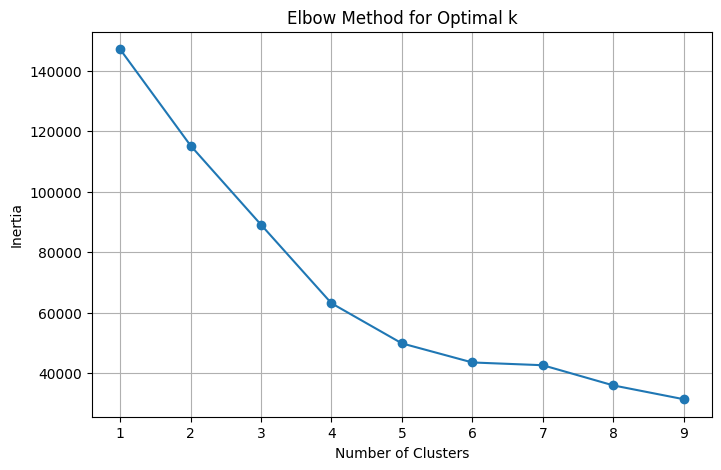

In [3]:
inertia = []
K_range = range(1, 10)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()


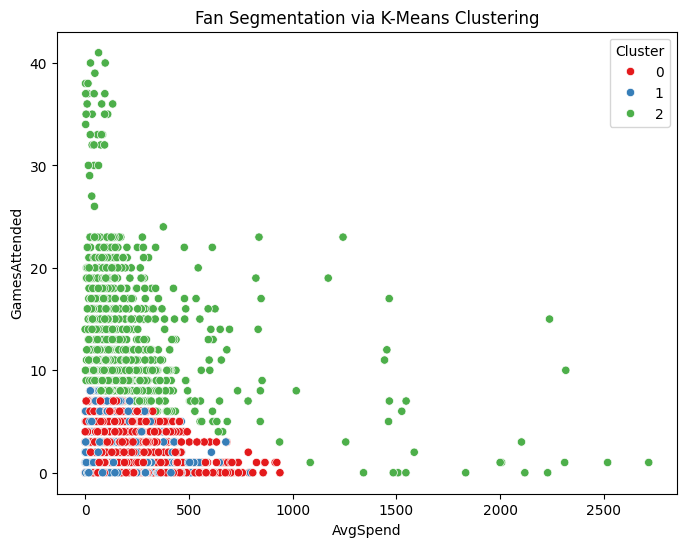

In [4]:
# Choose the number of clusters (e.g., k = 3 based on the elbow plot)
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(features_scaled)

# Add the cluster assignments to the original DataFrame
df['Cluster'] = clusters

# Scatter plot: AvgSpend vs. GamesAttended with cluster labels
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['AvgSpend'], y=df['GamesAttended'], hue=df['Cluster'], palette='Set1')
plt.xlabel('AvgSpend')
plt.ylabel('GamesAttended')
plt.title('Fan Segmentation via K-Means Clustering')
plt.show()


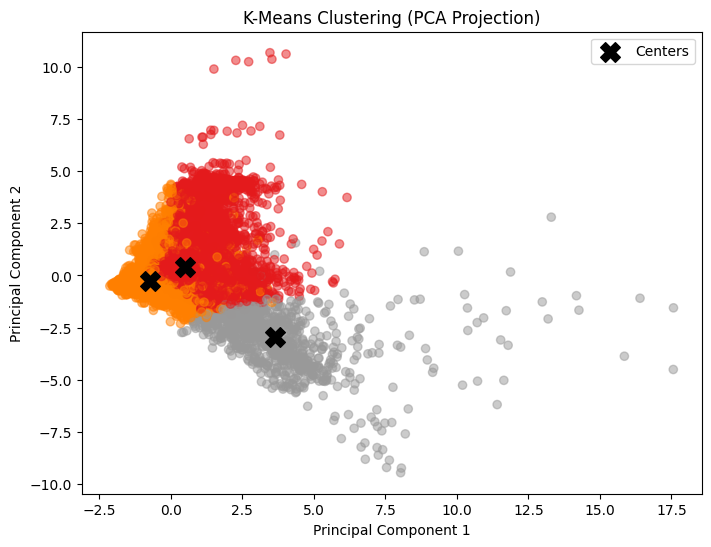

In [5]:
from sklearn.decomposition import PCA

# Reduce dimensions to 2D for visualization
pca = PCA(n_components=2)
features_pca = pca.fit_transform(features_scaled)

# Project cluster centers as well
centers_pca = pca.transform(kmeans.cluster_centers_)

plt.figure(figsize=(8,6))
plt.scatter(features_pca[:, 0], features_pca[:, 1], c=clusters, cmap='Set1', alpha=0.5)
plt.scatter(centers_pca[:, 0], centers_pca[:, 1], c='black', marker='X', s=200, label='Centers')
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("K-Means Clustering (PCA Projection)")
plt.legend()
plt.show()
